[ 40592.44160347 123307.29144789  65030.91996659  63151.03701558
 115787.75964385 108268.22783981 116727.70111936  64090.97849109
  76310.21767265 100748.69603577]
[ 37731 122391  57081  63218 116969 109431 112635  55794  83088 101302]


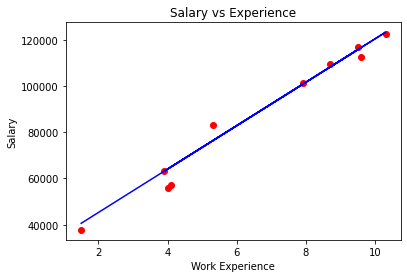

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

class LinearRegression():
    def __init__(self, learning_rate, number_of_iterations):
        self.learning_rate = learning_rate
        self.number_of_iterations = number_of_iterations
    
    def GradientDescent(self, X_train, y_train):
        m_current = b_current = 0
        n = len(X_train)
        
        for i in range(self.number_of_iterations):
            y_predicted = m_current * X_train + b_current
            cost_function = (1/n) * (sum(value**2 for value in (y_train - y_predicted)))
            m_derivative = -(2/n)*sum(X_train*(y_train-y_predicted))
            b_derivative = -(2/n)*sum(y_train-y_predicted)
            m_current = m_current - (self.learning_rate * m_derivative)
            b_current = b_current - (self.learning_rate * b_derivative)
            #print('m: {}, b: {}, cost: {}, iterations: {}'.format(m_current, b_current, cost_function, i))
        self.m_current = m_current
        self.b_current = b_current
    
    def Predict(self, X_test):
        LinearRegression.GradientDescent(self, self.X_train, self.y_train)
        prediction = self.m_current * X_test + self.b_current
        return prediction
    
    def Fit(self, X_train, y_train):
        #return np.hstack((X_train, y_train.reshape(X_train.shape[0], 1)))
        self.X_train = X_train
        self.y_train = y_train
     
    
        

def main():
    lr = LinearRegression(0.0001, 100000)
    #lr.GradientDescent(X_train, y_train)
    X_train = np.array([1,2,3,4,5])
    y_train= np.array([5,7,9,11,13])
    
    Salary_DataFrame = pd.read_csv('D:\Python Project\Linear Regression\salary_data.csv')
    Salary_Array_X = np.array(Salary_DataFrame['YearsExperience'])
    Salary_Array_y = np.array(Salary_DataFrame['Salary'])
    X_train, X_test, y_train, y_test = train_test_split(Salary_Array_X, Salary_Array_y, test_size=0.33, random_state=0)
    
    lr.Fit(X_train, y_train)
    prediction = lr.Predict(X_test)
    print(prediction)
    print(y_test)
    
    #Visualize the model
    plt.scatter(X_test, y_test, color='red')
    plt.plot(X_test, prediction, color='blue')
    plt.xlabel('Work Experience')
    plt.ylabel('Salary')
    plt.title('Salary vs Experience')
    plt.show()
    
main()